In [4]:
import numpy
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [41]:
m,n = 100,2
labels = 2
X,y = make_blobs(n_samples=m,n_features=n,centers=labels)


In [78]:
y = y.reshape(-1,1)

In [42]:
X.shape,y.shape

((100, 2), (100,))

In [43]:
numpy.unique(y)

array([0, 1])

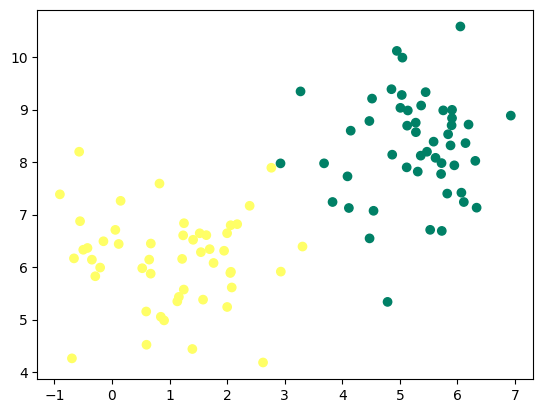

In [44]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='summer')

In [79]:
def initialisation(X):
  W = numpy.random.rand(X.shape[1],1)
  b = numpy.random.rand(1)
  return W,b
def model(X,W,b):
  Z = X.dot(W)+b
  return 1/(1+numpy.exp(-Z))
def log_loss(A,y):
  return -(1/len(y))*(y*numpy.log(A) + (1-y)*numpy.log(1-A)).sum()
def gradients(X,A,y):
  dW = (1/len(y))*X.T.dot(A-y)
  db = (1/len(y))*(A-y).sum()
  return dW,db
def update(W,b,dW,db,learning_rate):
  W = W - learning_rate*dW
  b = b - learning_rate*db
  return W,b


In [80]:
W,b = initialisation(X)
losses = []
for i in range(1000):
  A = model(X,W,b)
  loss = log_loss(A,y)
  losses.append(loss)
  dW,db = gradients(X,A,y)
  W,b = update(W,b,dW,db,learning_rate=0.1)

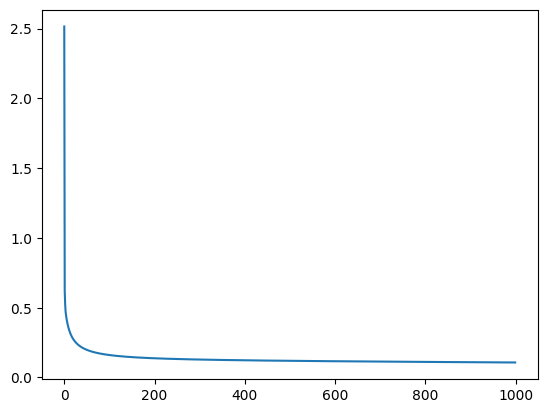

In [81]:
plt.plot(losses)

In [82]:
from sklearn.metrics import accuracy_score

In [83]:
def predict(A):
  return A>=0.5

In [84]:
A.shape

(100, 1)

In [85]:
y_pred = predict(A)+0
accuracy_score(y,y_pred)

0.95

In [88]:
y.shape,X.shape

((100, 1), (100, 2))

In [93]:
x1 = numpy.linspace(-1,7,100)

In [94]:
x2 = (-x1*W[0]-b)/W[1]

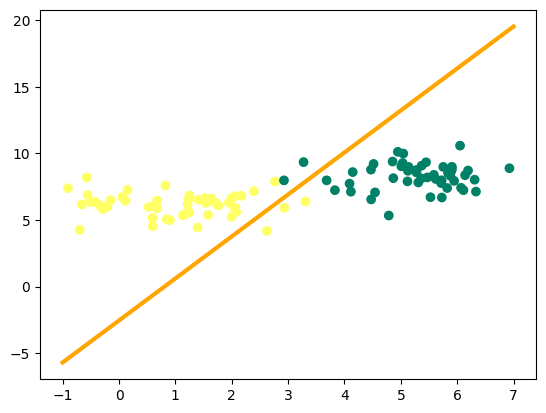

In [96]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='summer')
plt.plot(x1, x2, c='orange', lw=3)